<a href="https://colab.research.google.com/github/Samgomes2510/Projeto_arvore_decisao/blob/main/Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 18** - Regressão Linear - Projeto

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [10]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')
df.head()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0


In [11]:
# Etapa 1: Verificação de tipos e dados faltantes
print("\nTipos de dados:")
print(df.dtypes)
print("\nValores faltantes:")
print(df.isnull().sum())



Tipos de dados:
Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

Valores faltantes:
Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64


Como não há dados faltantes, seguimos para a etapa seguinte

In [12]:
# Etapa 2: Análise univariada

print("\nResumo estatístico:")
print(df.describe())



Resumo estatístico:
       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%       1.000000

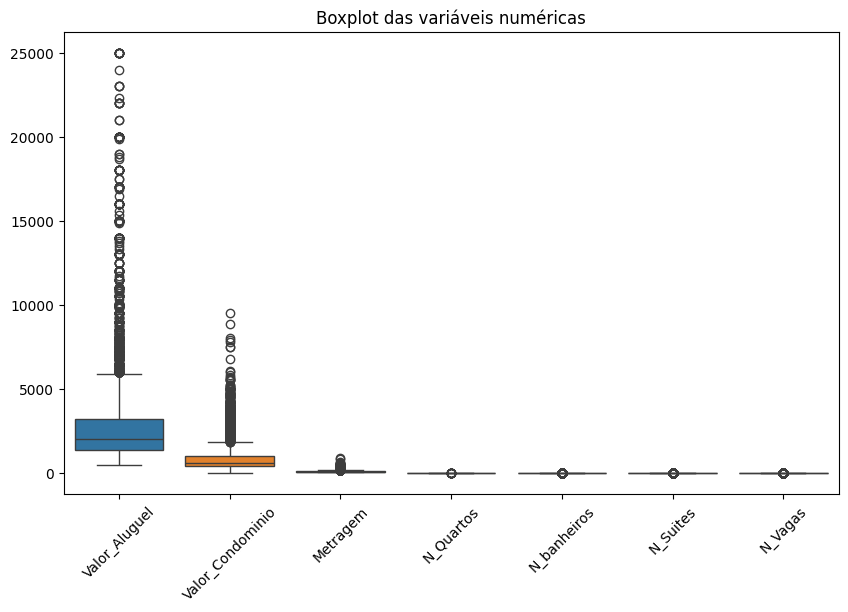

In [13]:
# Gráfico boxplot para verificar outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot das variáveis numéricas")
plt.xticks(rotation=45)
plt.show()


Observa-se que algumas variáveis como 'Valor_Condominio' têm outliers visíveis, indicando variações grandes no valor do condomínio.


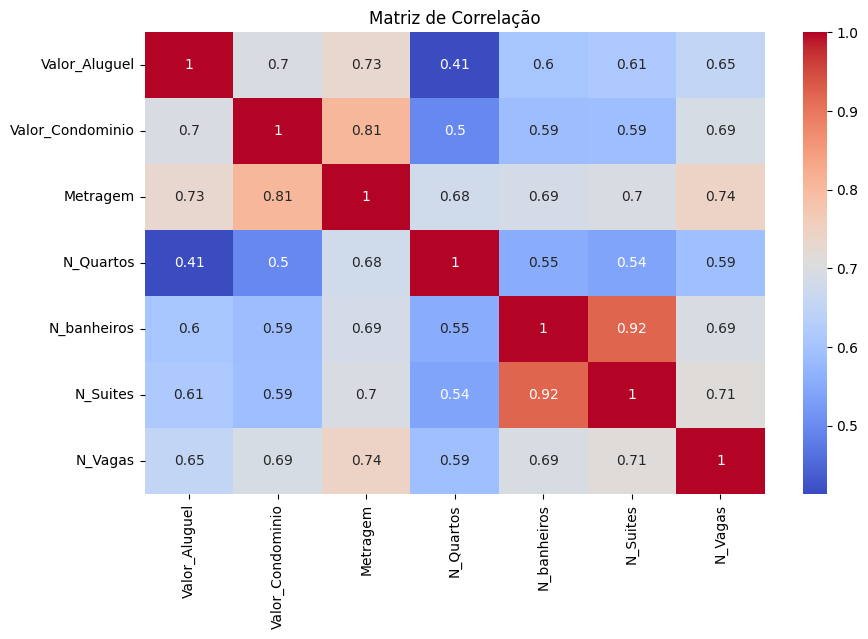

In [14]:
# Análise bivariada: correlação entre variáveis

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


Insight: 'Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros' têm correlação positiva com o valor do aluguel.


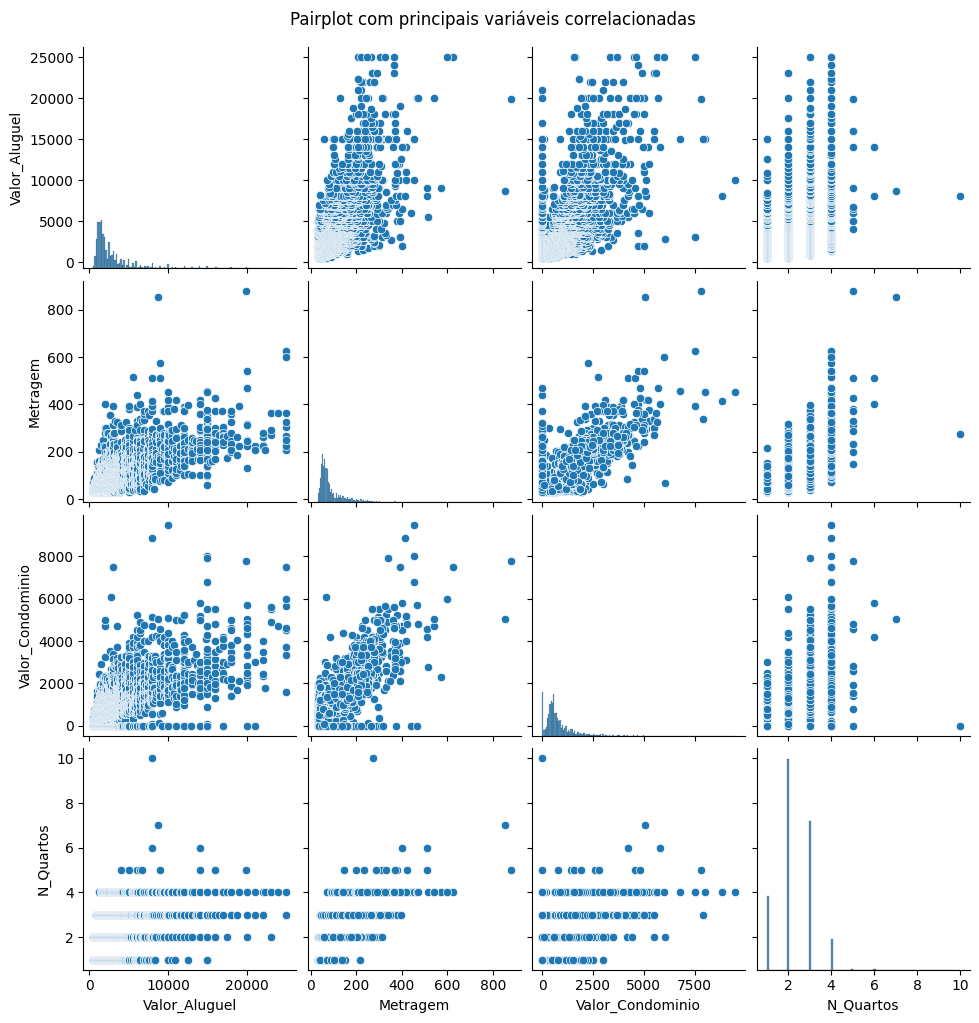

In [15]:
# Gráficos de dispersão para relações bivariadas

sns.pairplot(df[['Valor_Aluguel', 'Metragem', 'Valor_Condominio', 'N_Quartos']])
plt.suptitle("Pairplot com principais variáveis correlacionadas", y=1.02)
plt.show()


In [16]:
# Etapa 3: Separando variáveis X e y

X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']


In [17]:
# Separando treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Regressão Linear Simples com Metragem

In [19]:
X_train_metragem = X_train[['Metragem']]
X_test_metragem = X_test[['Metragem']]

modelo_simples = LinearRegression()
modelo_simples.fit(X_train_metragem, y_train)

print("\nIntercepto:", modelo_simples.intercept_)
print("Coeficiente (beta):", modelo_simples.coef_[0])



Intercepto: -90.4636457339002
Coeficiente (beta): 34.483748266883225


Equação da reta:

In [21]:
print(f"y = {modelo_simples.intercept_:.2f} + {modelo_simples.coef_[0]:.2f} * x")

y = -90.46 + 34.48 * x


In [22]:
# Avaliando com R² treino e teste

r2_treino = modelo_simples.score(X_train_metragem, y_train)
r2_teste = modelo_simples.score(X_test_metragem, y_test)
print("\nR² - Treino:", r2_treino)
print("R² - Teste:", r2_teste)



R² - Treino: 0.5175003940731389
R² - Teste: 0.5667730731423721


O modelo simples explica cerca de {:.0f}% da variabilidade no aluguel (teste), o que é razoável dado que usamos apenas uma variável.


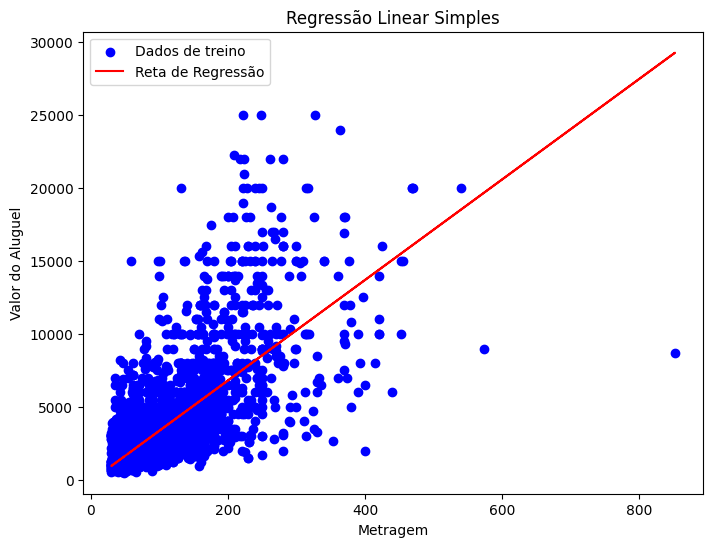

In [23]:
# Gráfico da regressão

plt.figure(figsize=(8, 6))
plt.scatter(X_train_metragem, y_train, color='blue', label='Dados de treino')
plt.plot(X_train_metragem, modelo_simples.predict(X_train_metragem), color='red', label='Reta de Regressão')
plt.xlabel("Metragem")
plt.ylabel("Valor do Aluguel")
plt.title("Regressão Linear Simples")
plt.legend()
plt.show()


In [24]:
# Regressão Linear Múltipla

modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)
r2_multiplo_treino = modelo_multiplo.score(X_train, y_train)
r2_multiplo_teste = modelo_multiplo.score(X_test, y_test)
print("\nR² (Múltipla) - Treino:", r2_multiplo_treino)
print("R² (Múltipla) - Teste:", r2_multiplo_teste)



R² (Múltipla) - Treino: 0.5956434956405704
R² (Múltipla) - Teste: 0.6307353793799015


A regressão múltipla teve um R² maior que o modelo simples, sugerindo que usar mais variáveis melhora a capacidade de explicação do modelo.


In [25]:
# Comparativo Final

print("\nComparativo entre modelos:")
print(f"R² Linear Simples (teste): {r2_teste:.2f}")
print(f"R² Linear Múltipla (teste): {r2_multiplo_teste:.2f}")



Comparativo entre modelos:
R² Linear Simples (teste): 0.57
R² Linear Múltipla (teste): 0.63


A regressão múltipla é mais adequada neste contexto, pois captura melhor a variabilidade dos dados, enquanto a simples é limitada por usar apenas a metragem.